# PIP install necessary packages 

In [1]:
!pip install --upgrade gitpython --user
!pip install --upgrade mpld3 --user

Requirement already up-to-date: gitpython in /home/oreilly/.local/lib/python3.4/site-packages
Requirement already up-to-date: gitdb>=0.6.4 in /home/oreilly/.local/lib/python3.4/site-packages (from gitpython)
Requirement already up-to-date: smmap>=0.8.5 in /home/oreilly/.local/lib/python3.4/site-packages (from gitdb>=0.6.4->gitpython)
Requirement already up-to-date: mpld3 in /home/oreilly/.local/lib/python3.4/site-packages


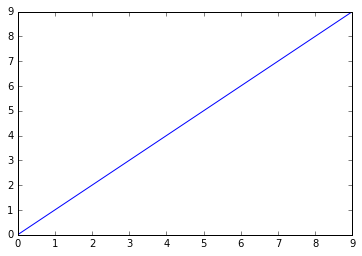

In [2]:
%matplotlib inline
import mpld3
mpld3.enable_notebook()
import matplotlib.pyplot as plt

plt.plot(range(10), range(10))


# GIT clone the corpus

In [1]:
!pip3 install --upgrade --user git+https://github.com/christian-oreilly/neurocurator.git@natLib


  Cloning https://github.com/christian-oreilly/neurocurator.git (to natLib) to /tmp/pip-i544rkg6-build
Requirement already up-to-date: numpy in /home/oreilly/.local/lib/python3.4/site-packages (from nat==0.1.0)
Requirement already up-to-date: parse in /home/oreilly/.local/lib/python3.4/site-packages (from nat==0.1.0)
Requirement already up-to-date: metapub in /home/oreilly/.local/lib/python3.4/site-packages (from nat==0.1.0)
Requirement already up-to-date: pyzotero in /home/oreilly/.local/lib/python3.4/site-packages (from nat==0.1.0)
    100% |################################| 409kB 5.1MB/s 
Requirement already up-to-date: biopython in /home/oreilly/.local/lib/python3.4/site-packages (from nat==0.1.0)
Requirement already up-to-date: beautifulsoup4 in /home/oreilly/.local/lib/python3.4/site-packages (from nat==0.1.0)
Requirement already up-to-date: wand in /home/oreilly/.local/lib/python3.4/site-packages (from nat==0.1.0)
Requirement already up-to-date: cssselect in /home/oreilly/.local

In [2]:

from git import Repo
import os

git_url = "https://github.com/christian-oreilly/corpus-thalamus.git"
repo_dir = os.path.join(os.getcwd(), "neurocuratorDB")
if not os.path.isdir(repo_dir):
    Repo.clone_from(git_url, repo_dir)
else:
    Repo(repo_dir).remotes.origin.pull()
    
# !git clone https://github.com/...

# Querying the corpus

In [3]:
# General imports
import sys, os
import matplotlib.pylab as plt
import seaborn as sns
import quantities as pq
import numpy as np

# Imports from NeuroCurator code base
from nat.annotationSearch import ParameterSearch, ConditionAtom

# Searching for annotations
searcher = ParameterSearch(repo_dir)
searcher.setSearchConditions(ConditionAtom("Parameter name", "conductance_ion_curr_max"))
searcher.expandRequiredTags = True
searcher.onlyCentralTendancy = True
resultDF = searcher.search()

# Checking which conductances have been specified as "specific conductances"
# (i.e., conductance densities) and normalizing the units.
isSpecific = []
allConductances = []
for v, u in zip(resultDF["Values"], resultDF["Unit"]):
    try:
        allConductances.append(float(pq.Quantity(v, u).rescale('S/cm**2')))
        isSpecific.append(True)
    except:
        isSpecific.append(False)

resultDF = resultDF[isSpecific]
resultDF["Values"] = np.log10(allConductances)

__init__ start
importing TreeData...
importing Annotation...
Importing from tag...
import from tagUtilities
import from treeData
import from ontoServ
done importing for tag
Init OntoManager...
Start OntoManager.appendAdditions...
Start OntoManager.addSuppTerms...
End OntoManager.appendAdditions...
/home/oreilly/.local/lib/python3.4/site-packages/nat/onto/onto*
{'/home/oreilly/.local/lib/python3.4/site-packages/nat/onto/onto*': []}
End importing from tag...
importing TextLocalizer...
__init__ end
importin Annotation...
importin modelingParameter...
importing treeData...
Done importing...
Init OntoManager...
Start OntoManager.appendAdditions...
Start OntoManager.addSuppTerms...
End OntoManager.appendAdditions...
/home/oreilly/.local/lib/python3.4/site-packages/nat/onto/onto*
{'/home/oreilly/.local/lib/python3.4/site-packages/nat/onto/onto*': []}
Incompatibility between in NIFMOL:nifext_8054:Sodium transient fast current. Correcting to BBP_nlx_0003:Sodium transient fast current
Incompatib

# Plotting the result of our query

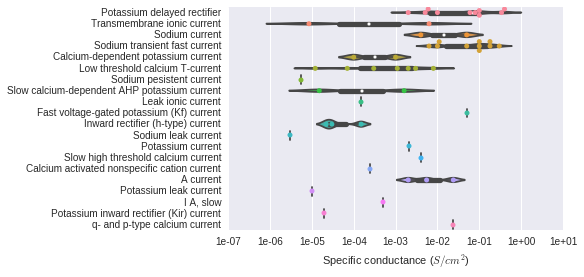

In [4]:
%matplotlib inline

# Plotting a violin plot for annotated values for specific conductances
# of the various kind of ionic currents 
g = sns.violinplot(y="Transmembrane ionic current", x="Values", data=resultDF, bw=0.25)
g = sns.swarmplot( y="Transmembrane ionic current", x="Values", data=resultDF)
g.set_ylabel("")
g.set_xlabel("Specific conductance ($S/cm^2$)")
g.set_xticklabels([('%.0e' % 10**nb) for nb in g.get_xticks()]) 
plt.plot()
plt.savefig('example_currents.png', bbox_inches='tight', transparent=True, dpi=200)

# Printing the JSON representation of a specific annotation of the plot

In [5]:
import json
record = resultDF[resultDF["Transmembrane ionic current"] == "Fast voltage-gated potassium (Kf) current"]
print(json.dumps(record["obj_annotation"].values[0].toJSON(), 
                 sort_keys=True, indent=4, separators=(',', ': ')))

{
    "annotId": "8e3edae6-ef34-11e5-ba5d-c869cd917532",
    "authors": [
        "iavarone",
        "oreilly"
    ],
    "comment": "Fast potassium current parameters",
    "experimentProperties": [],
    "localizer": {
        "location": 26404,
        "text": "The gKIR and the\nfast voltage-gated potassium channel ( gKf) had conductances of 20 \u0002s/\ncm2 and 50 mS/cm2, respectively. Both potassium channels had reversal\npotentials of 100 mV.",
        "type": "text"
    },
    "parameters": [
        {
            "description": {
                "depVar": {
                    "typeId": "BBP-030003",
                    "values": {
                        "statistic": "raw",
                        "type": "simple",
                        "unit": "mS/cm^2",
                        "values": [
                            50.0
                        ]
                    }
                },
                "type": "pointValue"
            },
            "id": "e47c93ba-ffdc-1

# Showing the annotated text in its context